In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import warnings
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, mean_squared_error
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from sklearn.ensemble import RandomForestClassifier


In [64]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [65]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [66]:

pip install -U pydotplus

Note: you may need to restart the kernel to use updated packages.


In [6]:
athlete_data = pd.read_excel("/Users/siddhi/Library/Containers/com.apple.iWork.Keynote/Data/Documents/Documents/ALY6040/Project/athlete_RAW.xlsx")

In [7]:
athlete_data.shape

(67328, 14)

In [8]:
athlete_data.head()

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal
0,23,Fritz Aanes,M,26.0,187.0,89.0,Norway,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",NaN
1,49,Moonika Aava,F,24.0,168.0,65.0,Estonia,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Javelin Throw,NaN
2,72,Aleksey Aleksandrovich Abalmasov,M,24.0,180.0,83.0,Belarus,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",NaN
3,75,Giorgos Abalof,M,22.0,178.0,70.0,Greece,2004 Summer,2004,Summer,Athina,Fencing,"Fencing Men's epee, Individual",NaN
4,81,Georgios Abaris,M,22.0,190.0,77.0,Greece,2004 Summer,2004,Summer,Athina,Football,Football Men's Football,NaN


In [9]:
athlete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67328 entries, 0 to 67327
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      67328 non-null  int64  
 1   Name    67328 non-null  object 
 2   Sex     67328 non-null  object 
 3   Age     67326 non-null  float64
 4   Height  66769 non-null  float64
 5   Weight  66291 non-null  float64
 6   Team    67328 non-null  object 
 7   Games   67328 non-null  object 
 8   Year    67328 non-null  int64  
 9   Season  67328 non-null  object 
 10  City    67328 non-null  object 
 11  Sport   67328 non-null  object 
 12  Event   67328 non-null  object 
 13  Medal   9656 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 7.2+ MB


In [10]:

data = athlete_data.dropna(subset= ['Weight','Height'])

print(data)

           ID                              Name Sex   Age  Height  Weight  \
0          23                       Fritz Aanes   M  26.0   187.0    89.0   
1          49                      Moonika Aava   F  24.0   168.0    65.0   
2          72  Aleksey Aleksandrovich Abalmasov   M  24.0   180.0    83.0   
3          75                    Giorgos Abalof   M  22.0   178.0    70.0   
4          81                   Georgios Abaris   M  22.0   190.0    77.0   
...       ...                               ...  ..   ...     ...     ...   
67323  135528                     Marc Zwiebler   M  32.0   181.0    75.0   
67324  135547     Viktoriya Viktorovna Zyabkina   F  23.0   174.0    62.0   
67325  135547     Viktoriya Viktorovna Zyabkina   F  23.0   174.0    62.0   
67326  135547     Viktoriya Viktorovna Zyabkina   F  23.0   174.0    62.0   
67327  135568            Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

             Team        Games  Year  Season            City       Sport  \

In [11]:
data['BMI']= (data['Weight'] / (data['Height'] * data['Height'])) * 10000

<ipython-input-11-f7d003858d3b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['BMI']= (data['Weight'] / (data['Height'] * data['Height'])) * 10000


In [12]:
data['Medal'] = data['Medal'].fillna('No medal')
data

<ipython-input-12-8d5fcce8a7e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Medal'] = data['Medal'].fillna('No medal')


,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,BMI
0,23,Fritz Aanes,M,26.0,187.0,89.0,Norway,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",No medal,25.451114
1,49,Moonika Aava,F,24.0,168.0,65.0,Estonia,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Javelin Throw,No medal,23.030045
2,72,Aleksey Aleksandrovich Abalmasov,M,24.0,180.0,83.0,Belarus,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",No medal,25.617284
3,75,Giorgos Abalof,M,22.0,178.0,70.0,Greece,2004 Summer,2004,Summer,Athina,Fencing,"Fencing Men's epee, Individual",No medal,22.093170
4,81,Georgios Abaris,M,22.0,190.0,77.0,Greece,2004 Summer,2004,Summer,Athina,Football,Football Men's Football,No medal,21.329640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67323,135528,Marc Zwiebler,M,32.0,181.0,75.0,Germany,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Men's Singles,No medal,22.893074
67324,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 100 metres,No medal,20.478267
67325,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 200 metres,No medal,20.478267
67326,135547,Viktoriya Viktorovna Zyabkina,F,23.0,174.0,62.0,Kazakhstan,2016 Summer,2016,Summer,Rio de Janeiro,Athletics,Athletics Women's 4 x 100 metres Relay,No medal,20.478267


In [74]:
data.describe()

,ID,Age,Height,Weight,Year,BMI
count,66186.000000,66184.000000,66186.000000,66186.000000,66186.000000,66186.000000
mean,68968.174584,25.953931,175.881319,71.130843,2009.996011,22.773803
std,39184.940984,5.488737,11.010921,15.328603,4.283930,3.118445
min,2.000000,12.000000,133.000000,28.000000,2004.000000,10.503834
25%,35329.250000,22.000000,168.000000,60.000000,2006.000000,20.761246
50%,69074.500000,25.000000,176.000000,70.000000,2010.000000,22.405877
75%,102737.000000,29.000000,183.000000,80.000000,2014.000000,24.251278
max,135570.000000,71.000000,226.000000,214.000000,2016.000000,63.901580


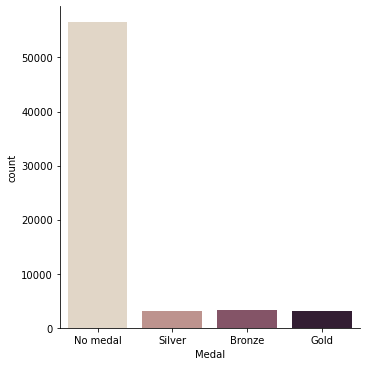

In [75]:
sns.catplot(x = 'Medal', kind = 'count', palette = 'ch:.25',data = data)

<AxesSubplot:title={'center':'Age'}, xlabel='Medal'>

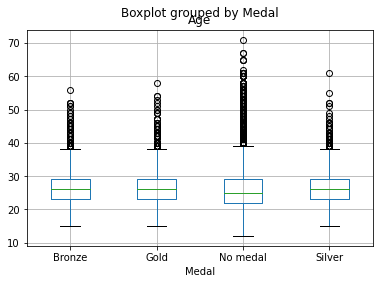

In [76]:
data.boxplot(column = ['Age'], by = 'Medal')

In [77]:
dummy_var = pd.get_dummies(data['Medal'])

In [78]:
df = pd.DataFrame(data[['BMI','Age','Height','Weight']])
df
d = pd.concat([df,dummy_var], axis =1 )
d
d = d.dropna()
d

,BMI,Age,Height,Weight,Bronze,Gold,No medal,Silver
0,25.451114,26.0,187.0,89.0,0,0,1,0
1,23.030045,24.0,168.0,65.0,0,0,1,0
2,25.617284,24.0,180.0,83.0,0,0,1,0
3,22.093170,22.0,178.0,70.0,0,0,1,0
4,21.329640,22.0,190.0,77.0,0,0,1,0
...,...,...,...,...,...,...,...,...
67323,22.893074,32.0,181.0,75.0,0,0,1,0
67324,20.478267,23.0,174.0,62.0,0,0,1,0
67325,20.478267,23.0,174.0,62.0,0,0,1,0
67326,20.478267,23.0,174.0,62.0,0,0,1,0


In [79]:
corr = d.corr()

In [80]:
print(corr)

               BMI       Age    Height    Weight    Bronze      Gold  \
BMI       1.000000  0.165071  0.335682  0.835409  0.024418  0.025212   
Age       0.165071  1.000000  0.127092  0.173753  0.012995  0.012969   
Height    0.335682  0.127092  1.000000  0.790747  0.035298  0.047866   
Weight    0.835409  0.173753  0.790747  1.000000  0.036678  0.045463   
Bronze    0.024418  0.012995  0.035298  0.036678  1.000000 -0.051104   
Gold      0.025212  0.012969  0.047866  0.045463 -0.051104  1.000000   
No medal -0.042791 -0.025669 -0.074357 -0.071976 -0.555762 -0.543643   
Silver    0.020609  0.016212  0.039039  0.036095 -0.050993 -0.049881   

          No medal    Silver  
BMI      -0.042791  0.020609  
Age      -0.025669  0.016212  
Height   -0.074357  0.039039  
Weight   -0.071976  0.036095  
Bronze   -0.555762 -0.050993  
Gold     -0.543643 -0.049881  
No medal  1.000000 -0.542464  
Silver   -0.542464  1.000000  


<AxesSubplot:>

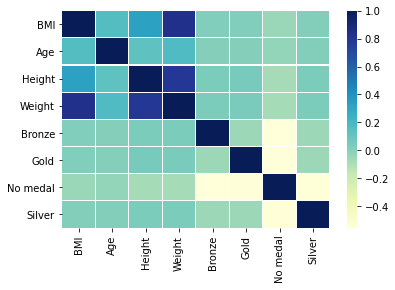

In [81]:
sns.heatmap(corr, cmap = 'YlGnBu',linewidths = 0.1)

In [24]:
data['Classify'] = ['Underweight' if(i < 20) else 'Normal' if(20 < i <= 25) else 'Overweight' for i in data.BMI]

<ipython-input-24-ee11d2f04566>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Classify'] = ['Underweight' if(i < 20) else 'Normal' if(20 < i <= 25) else 'Overweight' for i in data.BMI]


In [62]:
features = ['Age']

x = data[features]
y = data['Classify']

print(x,y)

        Age
0      26.0
1      24.0
2      24.0
3      22.0
4      22.0
...     ...
67323  32.0
67324  23.0
67325  23.0
67326  23.0
67327  33.0

[66186 rows x 1 columns] 0        Overweight
1            Normal
2        Overweight
3            Normal
4            Normal
            ...    
67323        Normal
67324        Normal
67325        Normal
67326        Normal
67327        Normal
Name: Classify, Length: 66186, dtype: object


In [27]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,Games,Year,Season,City,Sport,Event,Medal,BMI,Classify
0,23,Fritz Aanes,M,26.0,187.0,89.0,Norway,2004 Summer,2004,Summer,Athina,Wrestling,"Wrestling Men's Light-Heavyweight, Greco-Roman",No medal,25.451114,Overweight
1,49,Moonika Aava,F,24.0,168.0,65.0,Estonia,2004 Summer,2004,Summer,Athina,Athletics,Athletics Women's Javelin Throw,No medal,23.030045,Normal
2,72,Aleksey Aleksandrovich Abalmasov,M,24.0,180.0,83.0,Belarus,2004 Summer,2004,Summer,Athina,Canoeing,"Canoeing Men's Kayak Fours, 1,000 metres",No medal,25.617284,Overweight
3,75,Giorgos Abalof,M,22.0,178.0,70.0,Greece,2004 Summer,2004,Summer,Athina,Fencing,"Fencing Men's epee, Individual",No medal,22.093170,Normal
4,81,Georgios Abaris,M,22.0,190.0,77.0,Greece,2004 Summer,2004,Summer,Athina,Football,Football Men's Football,No medal,21.329640,Normal


# Random Forest

In [63]:
X_Train, X_Test, y_Train, y_Test = train_test_split(x, y, test_size=0.25, random_state=2022)

In [64]:
RandomForestModel = RandomForestClassifier(n_estimators = 30, 
                               max_depth=4,
                               max_features='auto', 
                               min_samples_leaf=4,
                               bootstrap=True, 
                               n_jobs=-1, 
                               criterion = 'entropy', 
                               random_state = 30)
RandomForestModel.fit(X_Train,y_Train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(criterion='entropy', max_depth=4, max_features='auto',
                       min_samples_leaf=4, n_estimators=30, n_jobs=-1,
                       random_state=30)

In [65]:
from sklearn import metrics

yPred = RandomForestModel.predict(X_Test)

RandomF_cnf = metrics.confusion_matrix(y_Test, yPred)
print(RandomF_cnf)

[[10917     0   104]
 [ 2960     0     3]
 [ 2429     0   134]]


In [119]:
print('Confusion Matrix: \n'+str(RandomF_cnf))

print('Accuracy:- '+str(round(accuracy_score(y_Test, yPred)*100,2))+'%')
print('Precision:- '+str(round(precision_score(y_Test, yPred,average='micro')*100,2))+'%')
print('Recall:- '+str(round(recall_score(y_Test, yPred, average='micro')*100,2))+'%')


print("Classification report - \n", classification_report(y_Test,yPred))

Confusion Matrix: 
[[10917     0   104]
 [ 2960     0     3]
 [ 2429     0   134]]
Accuracy:- 66.79%
Precision:- 66.79%
Recall:- 66.79%
Classification report - 
               precision    recall  f1-score   support

      Normal       0.67      0.99      0.80     11021
  Overweight       0.00      0.00      0.00      2963
 Underweight       0.56      0.05      0.10      2563

    accuracy                           0.67     16547
   macro avg       0.41      0.35      0.30     16547
weighted avg       0.53      0.67      0.55     16547



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
print("Classification report - \n", classification_report(y_Test,yPred))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification report - 
               precision    recall  f1-score   support

      Normal       0.67      0.99      0.80     11021
  Overweight       0.00      0.00      0.00      2963
 Underweight       0.56      0.05      0.10      2563

    accuracy                           0.67     16547
   macro avg       0.41      0.35      0.30     16547
weighted avg       0.53      0.67      0.55     16547



/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
data.isna().sum()

ID          0
Name        0
Sex         0
Age         2
Height      0
Weight      0
Team        0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
BMI         0
Classify    0
dtype: int64

In [43]:
data['Age'] = data['Age'].fillna(data['Age'].median())

<ipython-input-43-9502dce9a39d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'] = data['Age'].fillna(data['Age'].median())


In [44]:
data.isna().sum()

ID          0
Name        0
Sex         0
Age         0
Height      0
Weight      0
Team        0
Games       0
Year        0
Season      0
City        0
Sport       0
Event       0
Medal       0
BMI         0
Classify    0
dtype: int64

# Logistic Regression

In [103]:
features = ['Age','Height','Weight']

X = data[features] # Features
y = data['Classify'] # Target variable

In [104]:
X_Train, X_Test, y_Train, y_Test = train_test_split(X, y, test_size=0.25, random_state=2022)

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66186 entries, 0 to 67327
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        66186 non-null  int64  
 1   Name      66186 non-null  object 
 2   Sex       66186 non-null  object 
 3   Age       66186 non-null  float64
 4   Height    66186 non-null  float64
 5   Weight    66186 non-null  float64
 6   Team      66186 non-null  object 
 7   Games     66186 non-null  object 
 8   Year      66186 non-null  int64  
 9   Season    66186 non-null  object 
 10  City      66186 non-null  object 
 11  Sport     66186 non-null  object 
 12  Event     66186 non-null  object 
 13  Medal     66186 non-null  object 
 14  BMI       66186 non-null  float64
 15  Classify  66186 non-null  object 
dtypes: float64(4), int64(2), object(10)
memory usage: 10.6+ MB


In [115]:

logisticReg = LogisticRegression()
model = logisticReg.fit(X_Train, y_Train)


print(logisticReg)

LogisticRegression()


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [116]:
ylogPred = logisticReg.predict(X_Test)
print(confusion_matrix(y_Test, model.predict(X_Test)))

[[10910    96    15]
 [   75  2888     0]
 [   48     0  2515]]


In [121]:
print('Confusion Matrix: \n'+str(confusion_matrix(y_Test, model.predict(X_Test))))


print('Accuracy: '+str(round(accuracy_score(y_Test, ylogPred)*100,2))+'%')

print("Classification report - \n", classification_report(y_Test,ylogPred))

Confusion Matrix: 
[[10910    96    15]
 [   75  2888     0]
 [   48     0  2515]]
Accuracy: 98.59%
Classification report - 
               precision    recall  f1-score   support

      Normal       0.99      0.99      0.99     11021
  Overweight       0.97      0.97      0.97      2963
 Underweight       0.99      0.98      0.99      2563

    accuracy                           0.99     16547
   macro avg       0.98      0.98      0.98     16547
weighted avg       0.99      0.99      0.99     16547

